In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(23, 16)

In [6]:
df_states.shape

(1093, 15)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-22,56,31888,193463,225351,2842,2554.0,398.0,228193,2020-03-22T20:00:00Z,225351,126.0,590.0,37554.0,8685.0,46239.0
3,2020-03-23,56,42164,237321,279485,14571,3325.0,471.0,294056,2020-03-23T20:00:00Z,279485,73.0,771.0,43858.0,10276.0,54134.0
2,2020-03-24,56,51970,292758,344728,14433,4468.0,675.0,359161,2020-03-24T20:00:00Z,344728,204.0,1143.0,55437.0,9806.0,65243.0
1,2020-03-25,56,63675,355135,418810,14735,6136.0,887.0,433545,2020-03-25T20:00:00Z,418810,212.0,1668.0,62377.0,11705.0,74082.0
0,2020-03-26,56,80735,438603,519338,60251,10132.0,1163.0,579589,2020-03-26T20:00:00Z,519338,276.0,3996.0,83468.0,17060.0,100528.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-03-25,NE,61.0,1304.0,NaN,NaN,0.0,1365,2020-03-25T20:00:00Z,1365,0.0,0.0,329.0,9.0,338.0
31,2020-03-25,ND,39.0,1734.0,NaN,8.0,0.0,1773,2020-03-25T20:00:00Z,1773,0.0,3.0,280.0,5.0,285.0
30,2020-03-25,NC,504.0,9985.0,NaN,29.0,1.0,10489,2020-03-25T20:00:00Z,10489,1.0,29.0,1844.0,106.0,1950.0
28,2020-03-25,MS,377.0,1566.0,NaN,117.0,2.0,1943,2020-03-25T20:00:00Z,1943,1.0,31.0,14.0,57.0,71.0
0,2020-03-25,AK,42.0,1649.0,NaN,1.0,1.0,1691,2020-03-25T20:00:00Z,1691,1.0,1.0,663.0,6.0,669.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
1048,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-11T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1049,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,2020-03-10T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,0.0
1050,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-09T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1051,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-08T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1052,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-07T21:00:00Z,0,...,NaN,NaN,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,1053.000000,948.000000,374.000000,93.000000,398.000000,948.000000,1053.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1053.000000,1.053000e+03,1043.000000,1053.000000,943.000000,948.000000
mean,257.766382,1764.334388,188.946524,198.193548,8.949749,2049.097046,1846.169991,0.885115,6.119880,353.475524,63.424575,416.899101,29.408357,6.611580e+06,431.983206,0.000030,0.124678,0.000363
std,1557.178970,5253.018153,1090.284255,622.561753,24.207281,6725.514690,6410.157031,4.931510,64.371885,1115.728387,364.011827,1392.686050,16.175734,7.426928e+06,1607.189520,0.000089,0.148135,0.000653
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.000000,-1.000000,-6.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000
25%,3.000000,54.750000,4.000000,8.000000,1.000000,66.000000,41.000000,0.000000,0.000000,0.000000,1.000000,6.000000,16.000000,1.805832e+06,54.955978,0.000001,0.035260,0.000017
50%,22.000000,235.500000,20.000000,33.000000,2.000000,294.500000,206.000000,0.000000,0.000000,23.000000,6.000000,40.000000,29.000000,4.659978e+06,109.860468,0.000006,0.084297,0.000073
75%,107.000000,1231.000000,80.000000,83.000000,6.000000,1369.500000,1166.000000,0.000000,0.000000,208.000000,25.000000,242.000000,42.000000,7.535591e+06,229.511156,0.000029,0.152726,0.000410
max,30811.000000,72668.000000,12100.000000,3805.000000,285.000000,103479.000000,103479.000000,96.000000,1603.000000,13920.000000,5707.000000,16888.000000,72.000000,3.955704e+07,11490.119540,0.001577,0.887918,0.005295


# United States Positive Cases

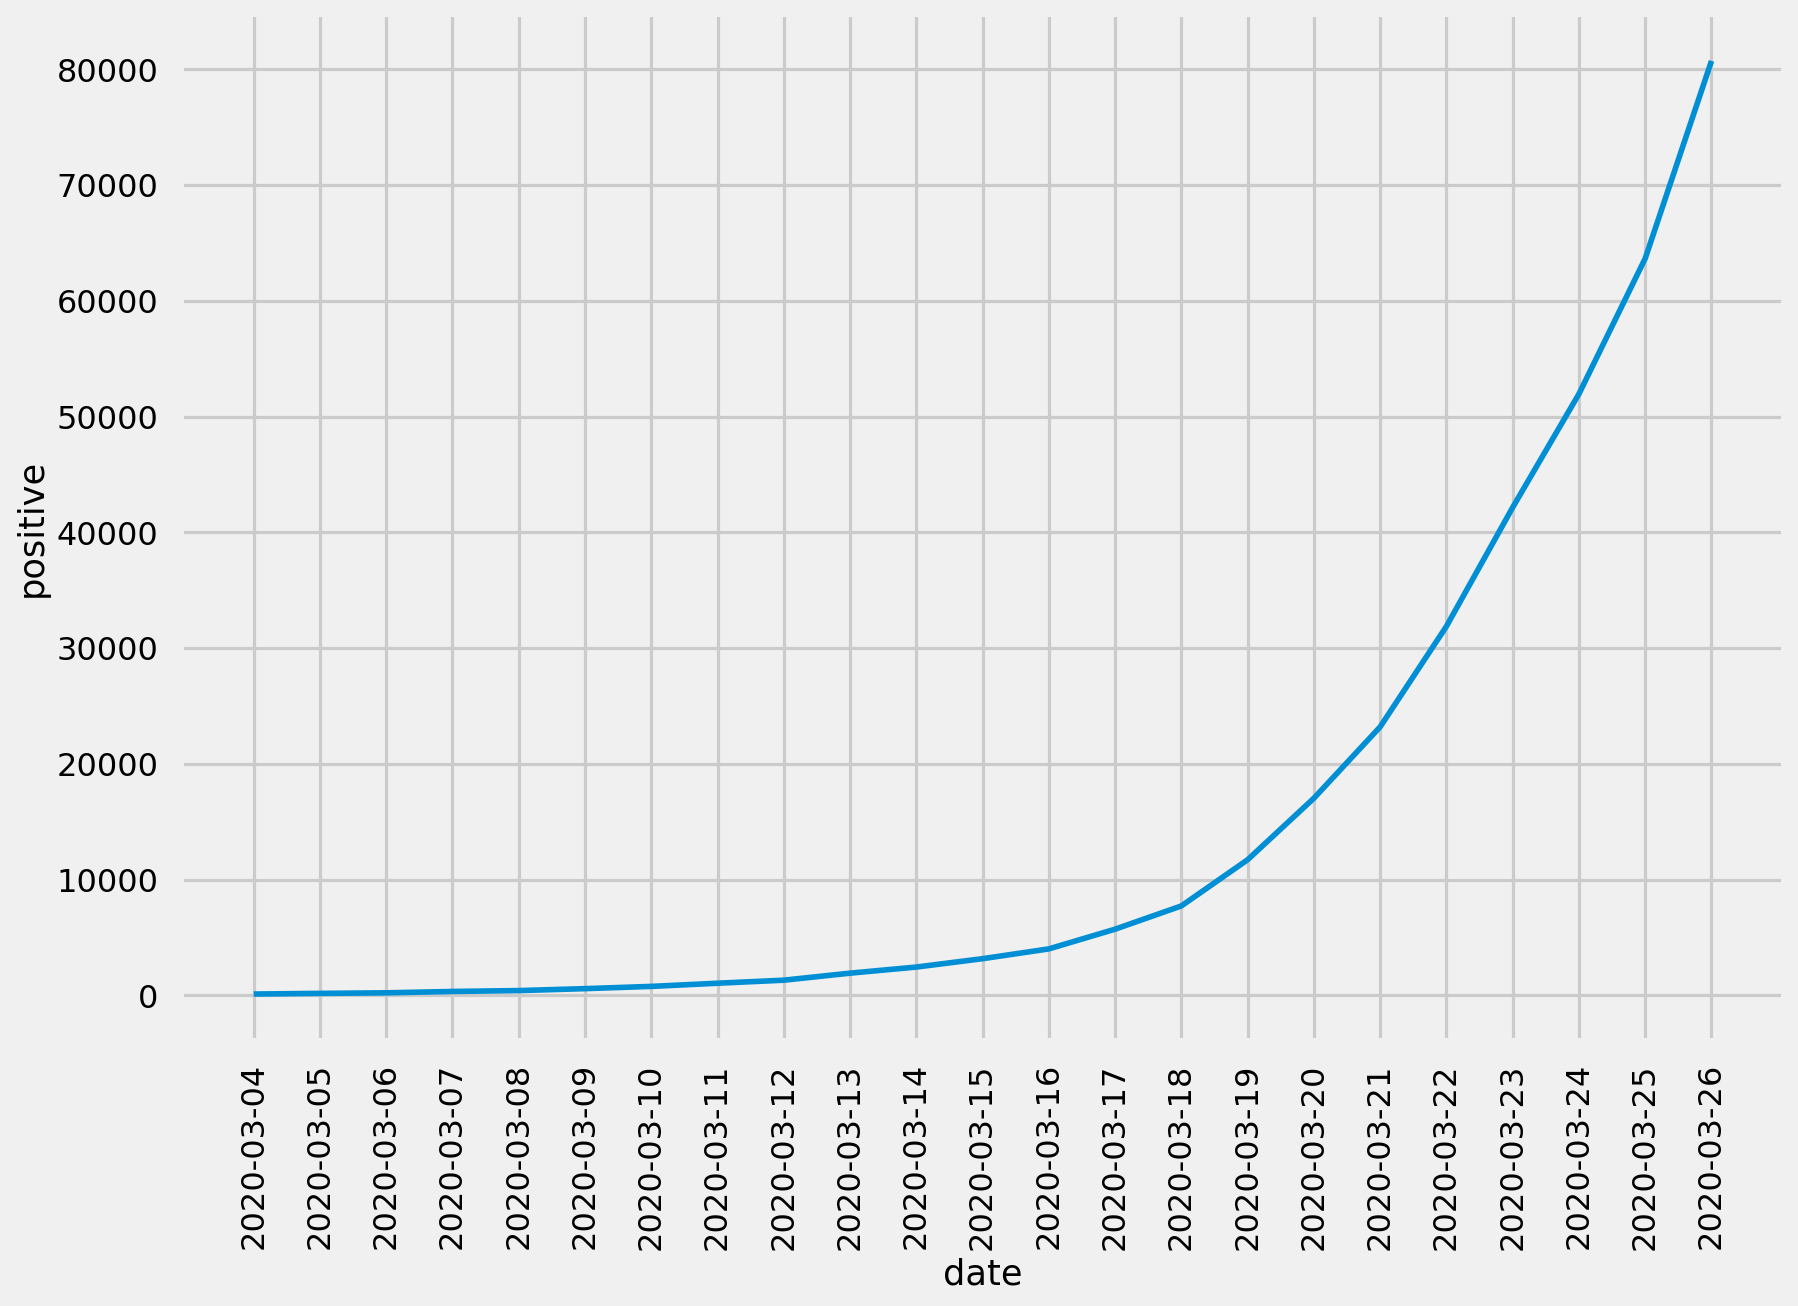

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

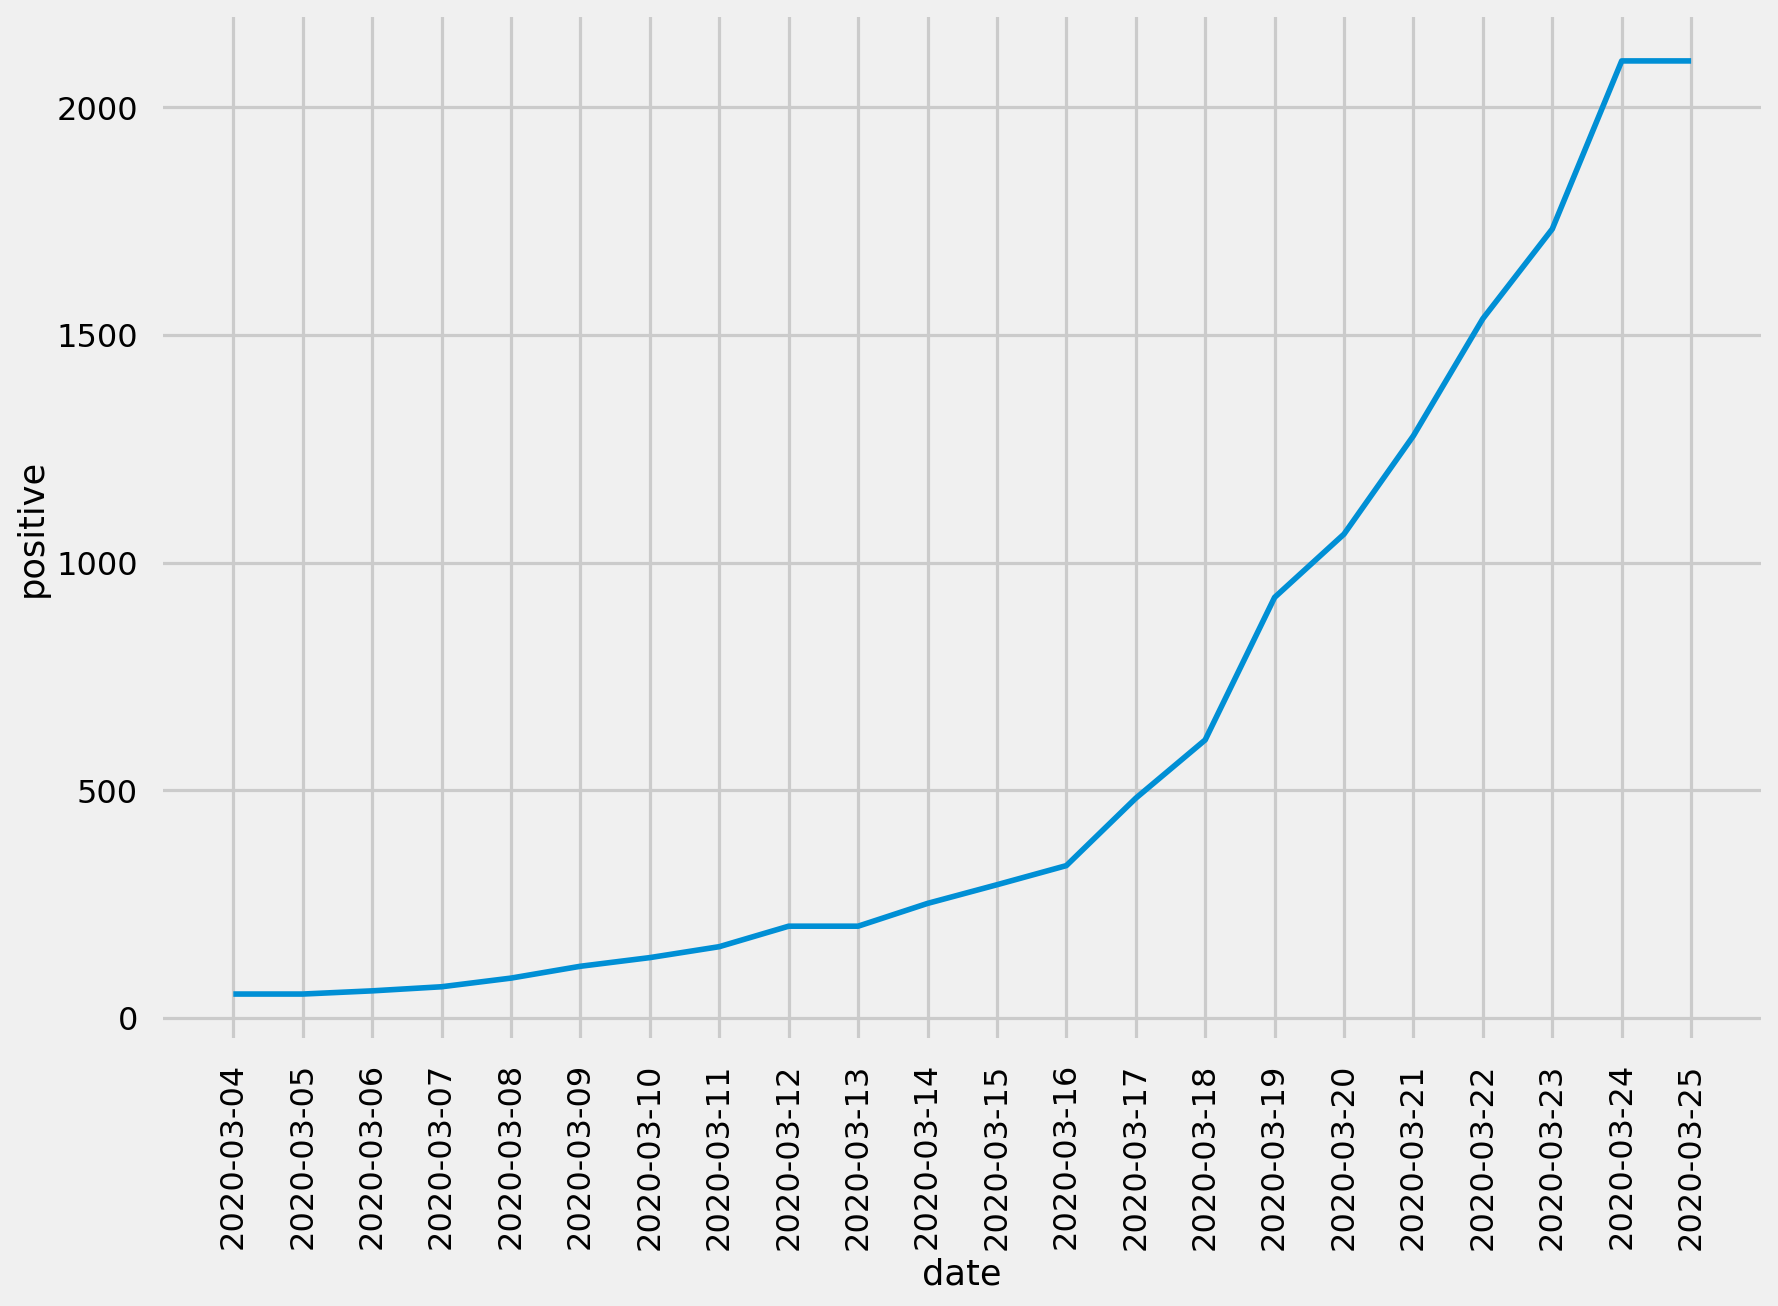

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

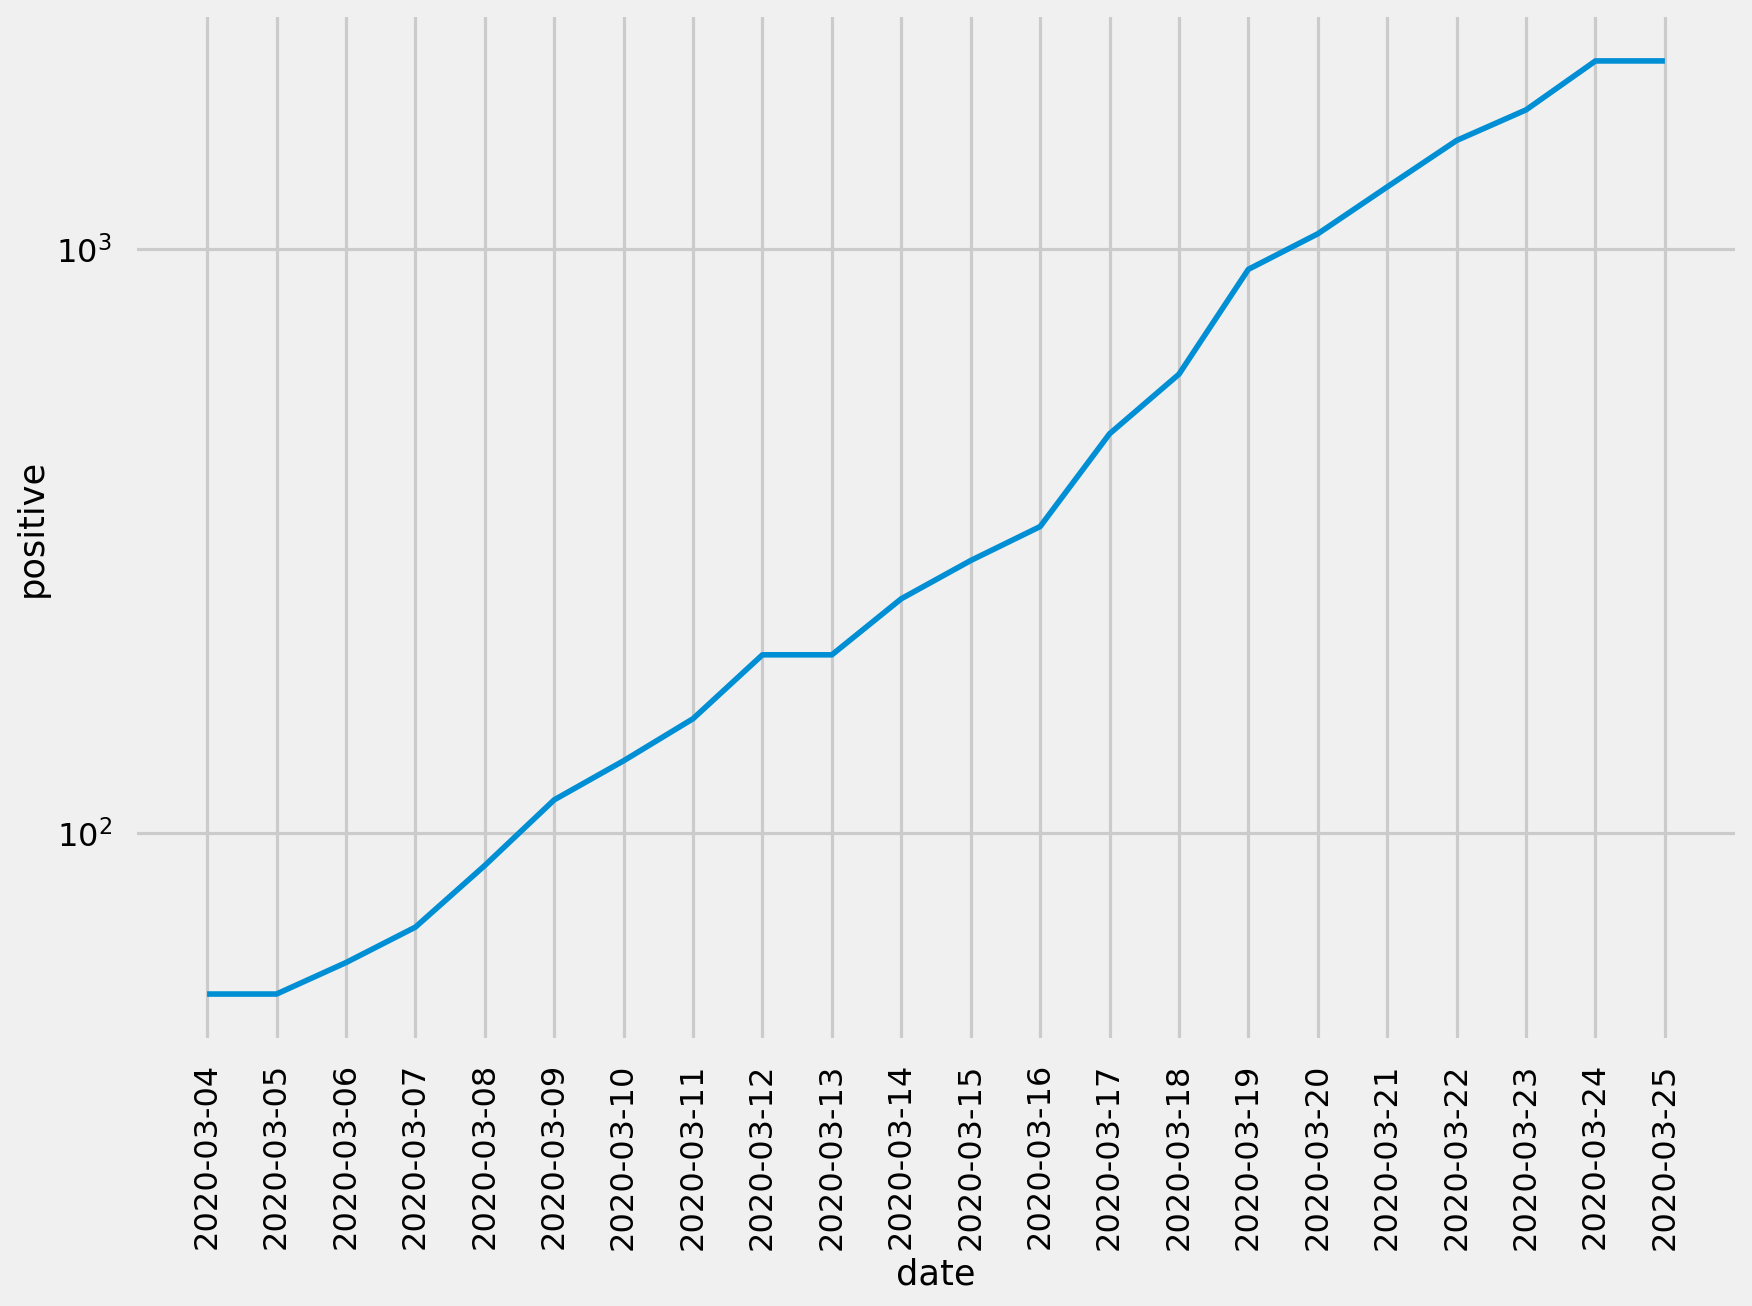

In [16]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## Positive and Total Tests

## California

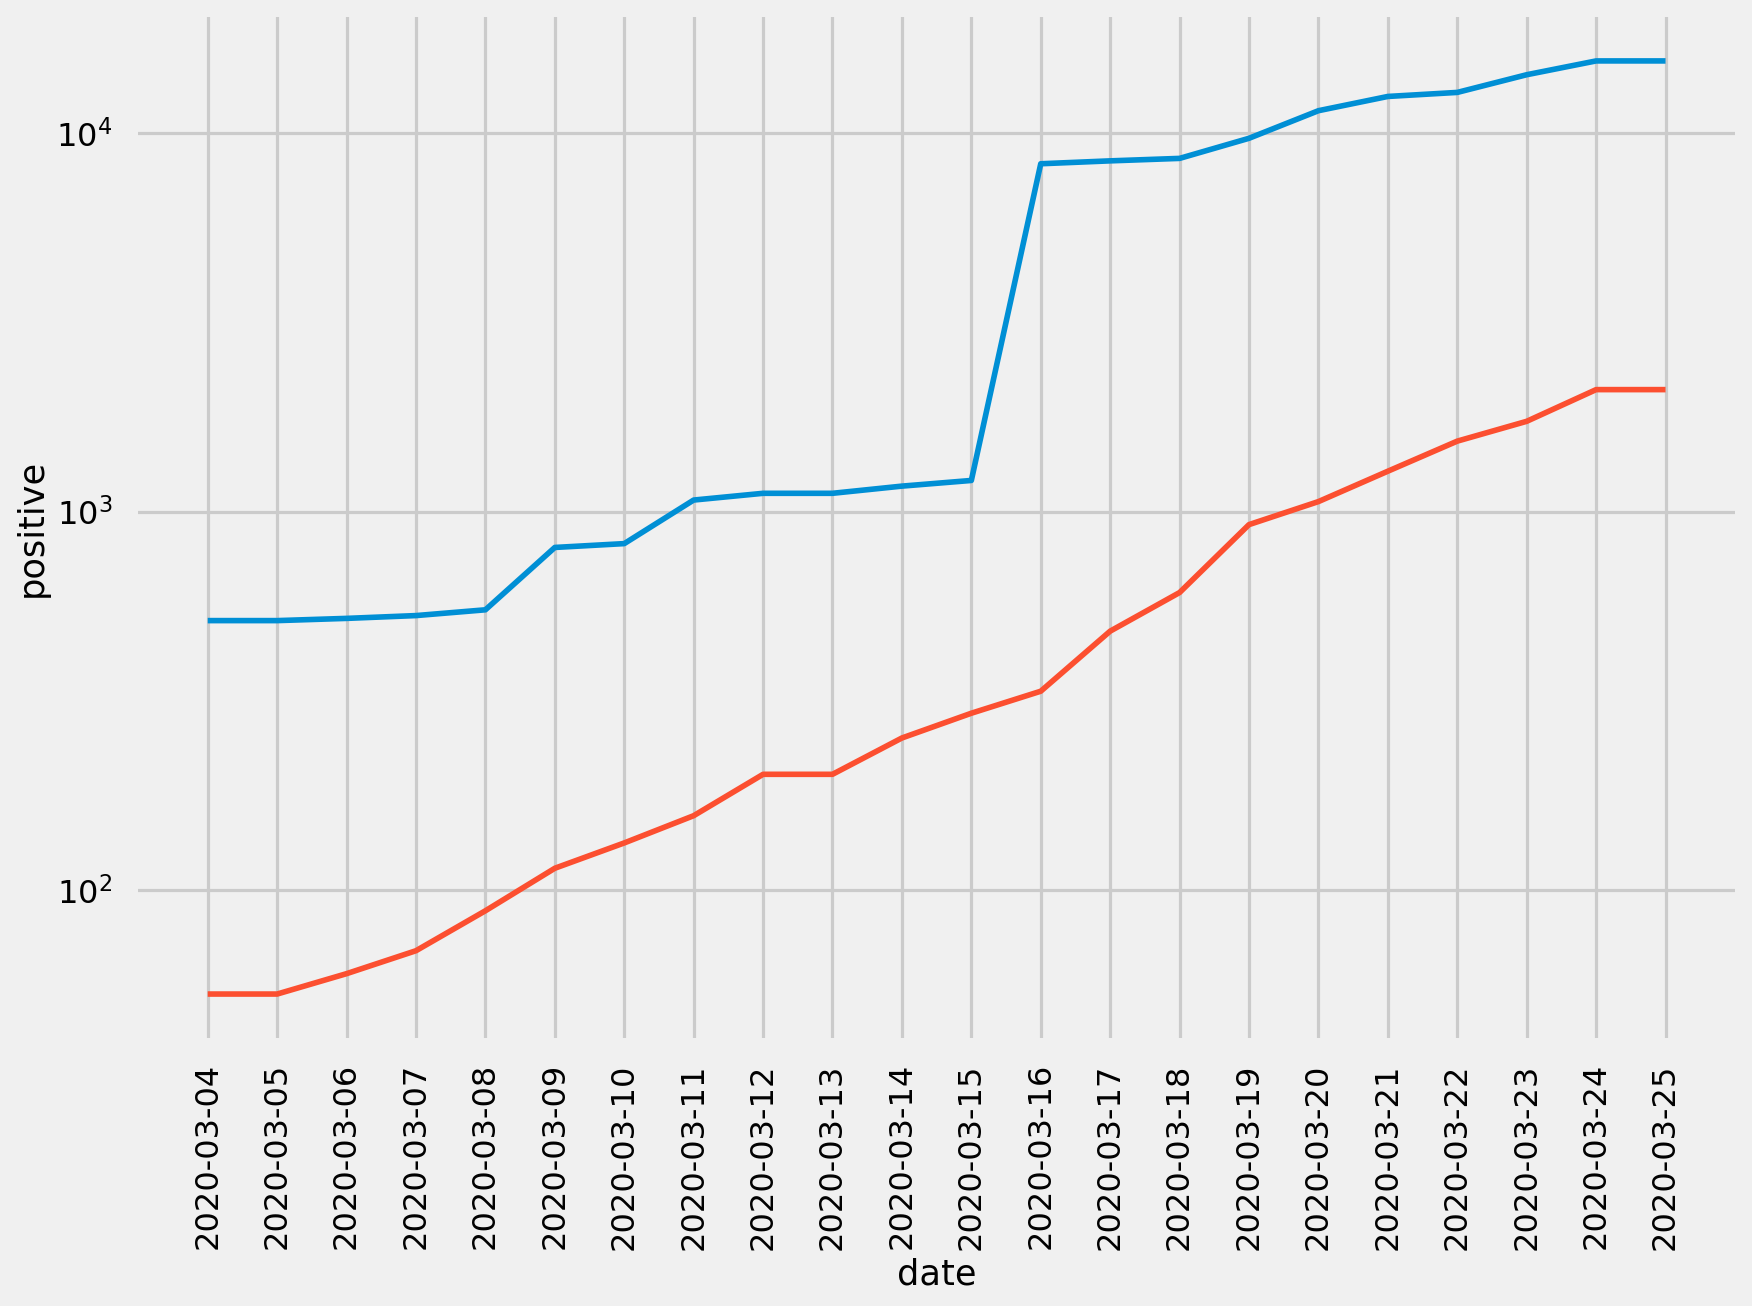

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## New York

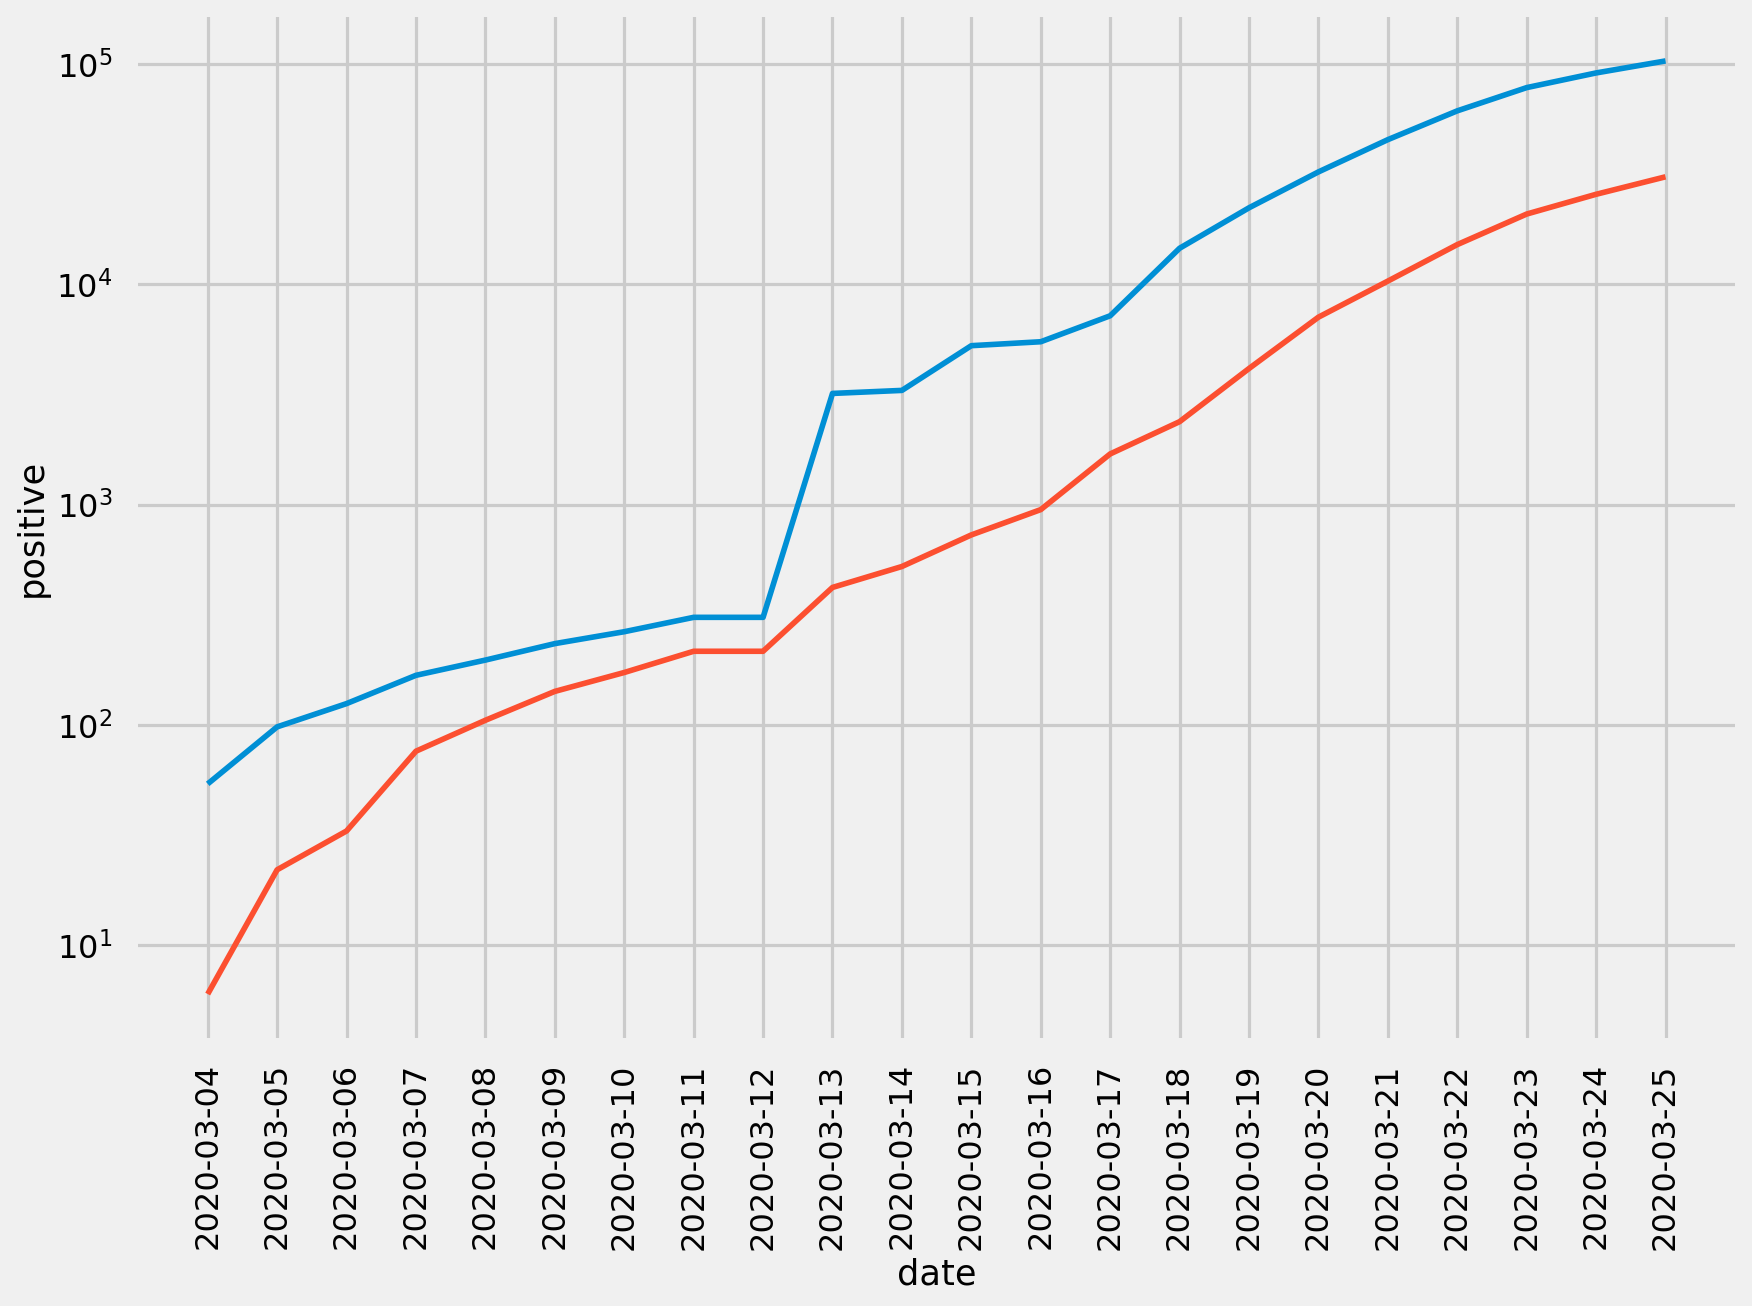

In [18]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'WA', 'MI', 'CA', 'IL', 'MA', 'LA', 'FL', 'GA']

In [20]:
df_states.query('date == @latest_date').sort_values(by='positive', ascending=False)[['state', 'positive']]

,state,positive
693,NY,30811.0
631,NJ,4402.0
970,WA,2469.0
449,MI,2294.0
81,CA,2102.0
286,IL,1865.0
387,MA,1838.0
368,LA,1795.0
184,FL,1682.0
206,GA,1247.0


# Top State Positive Cases (Log Scale)

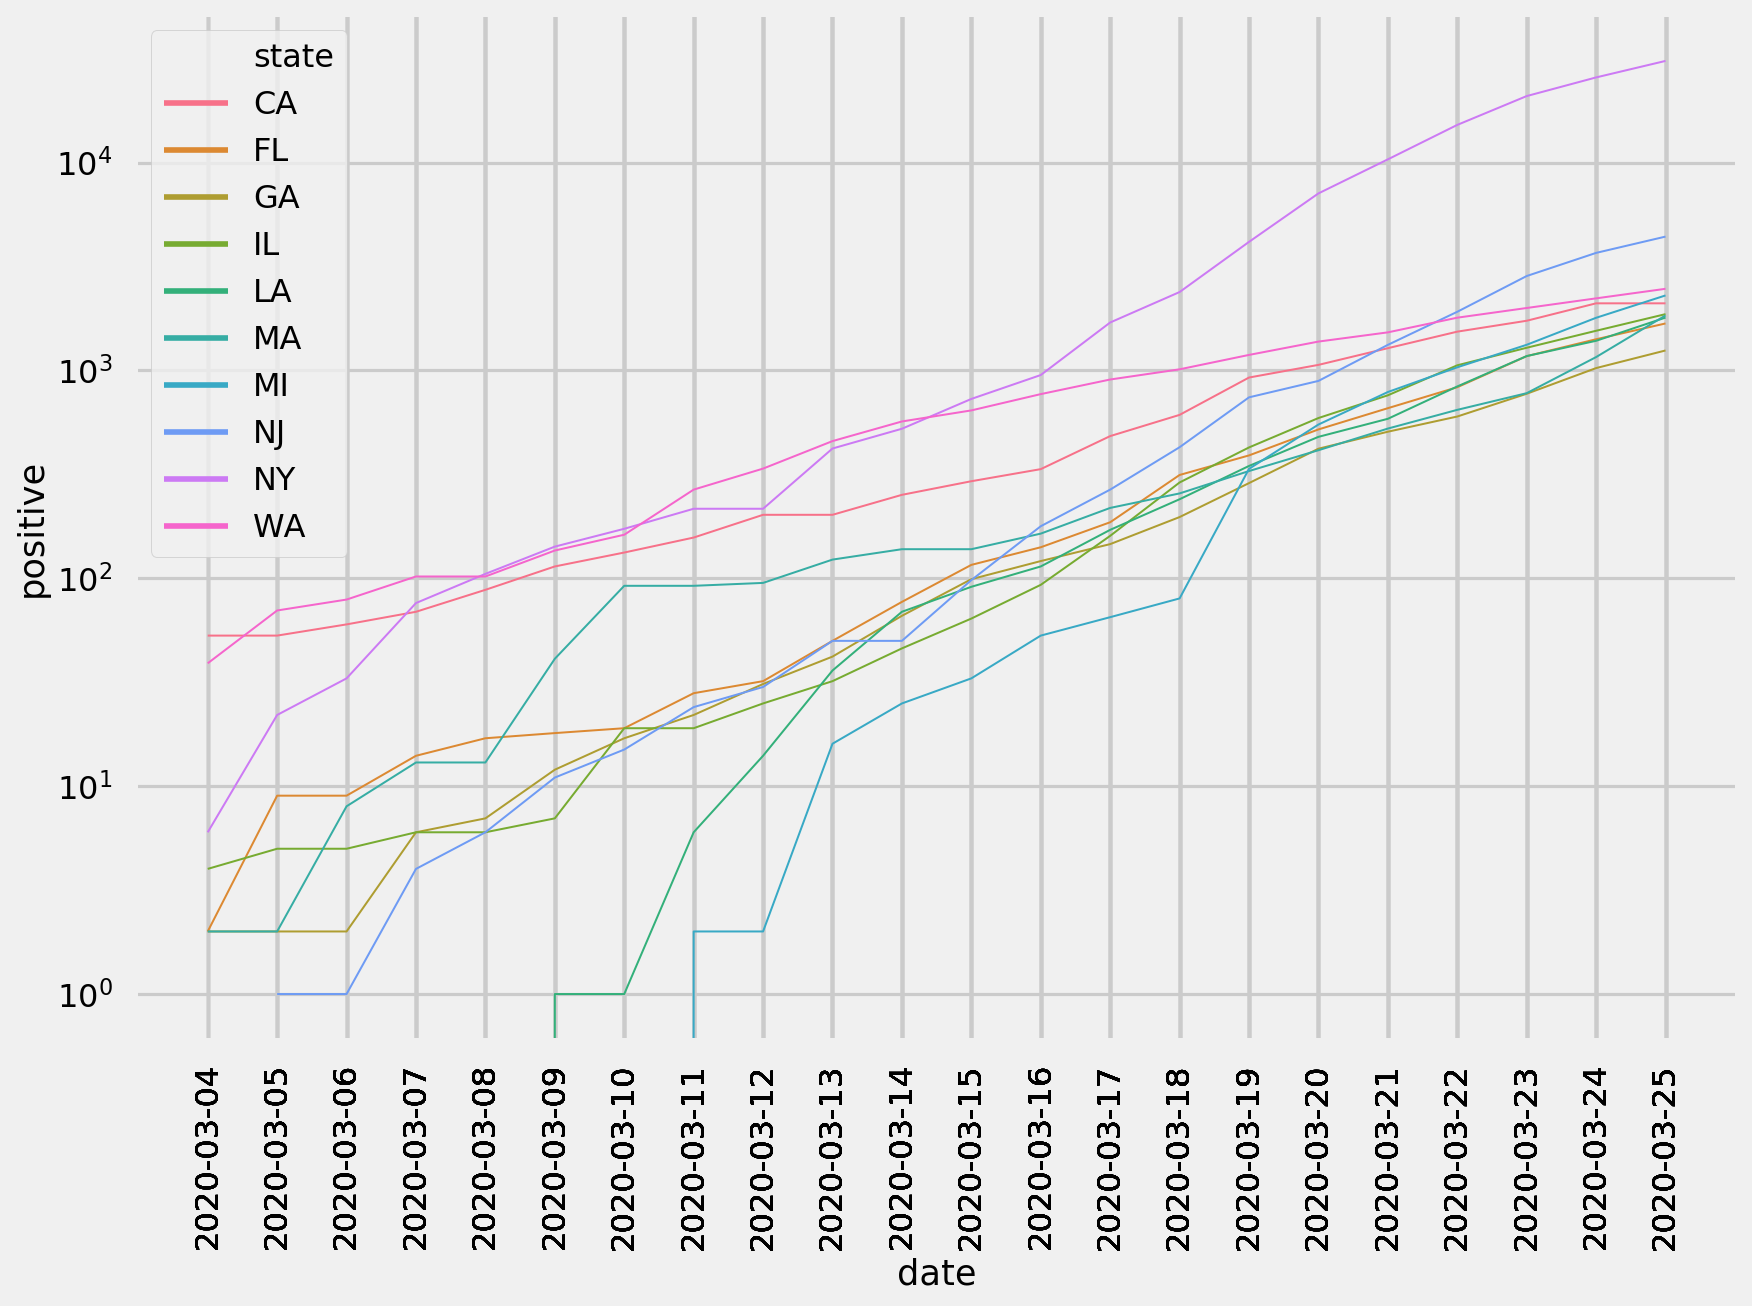

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

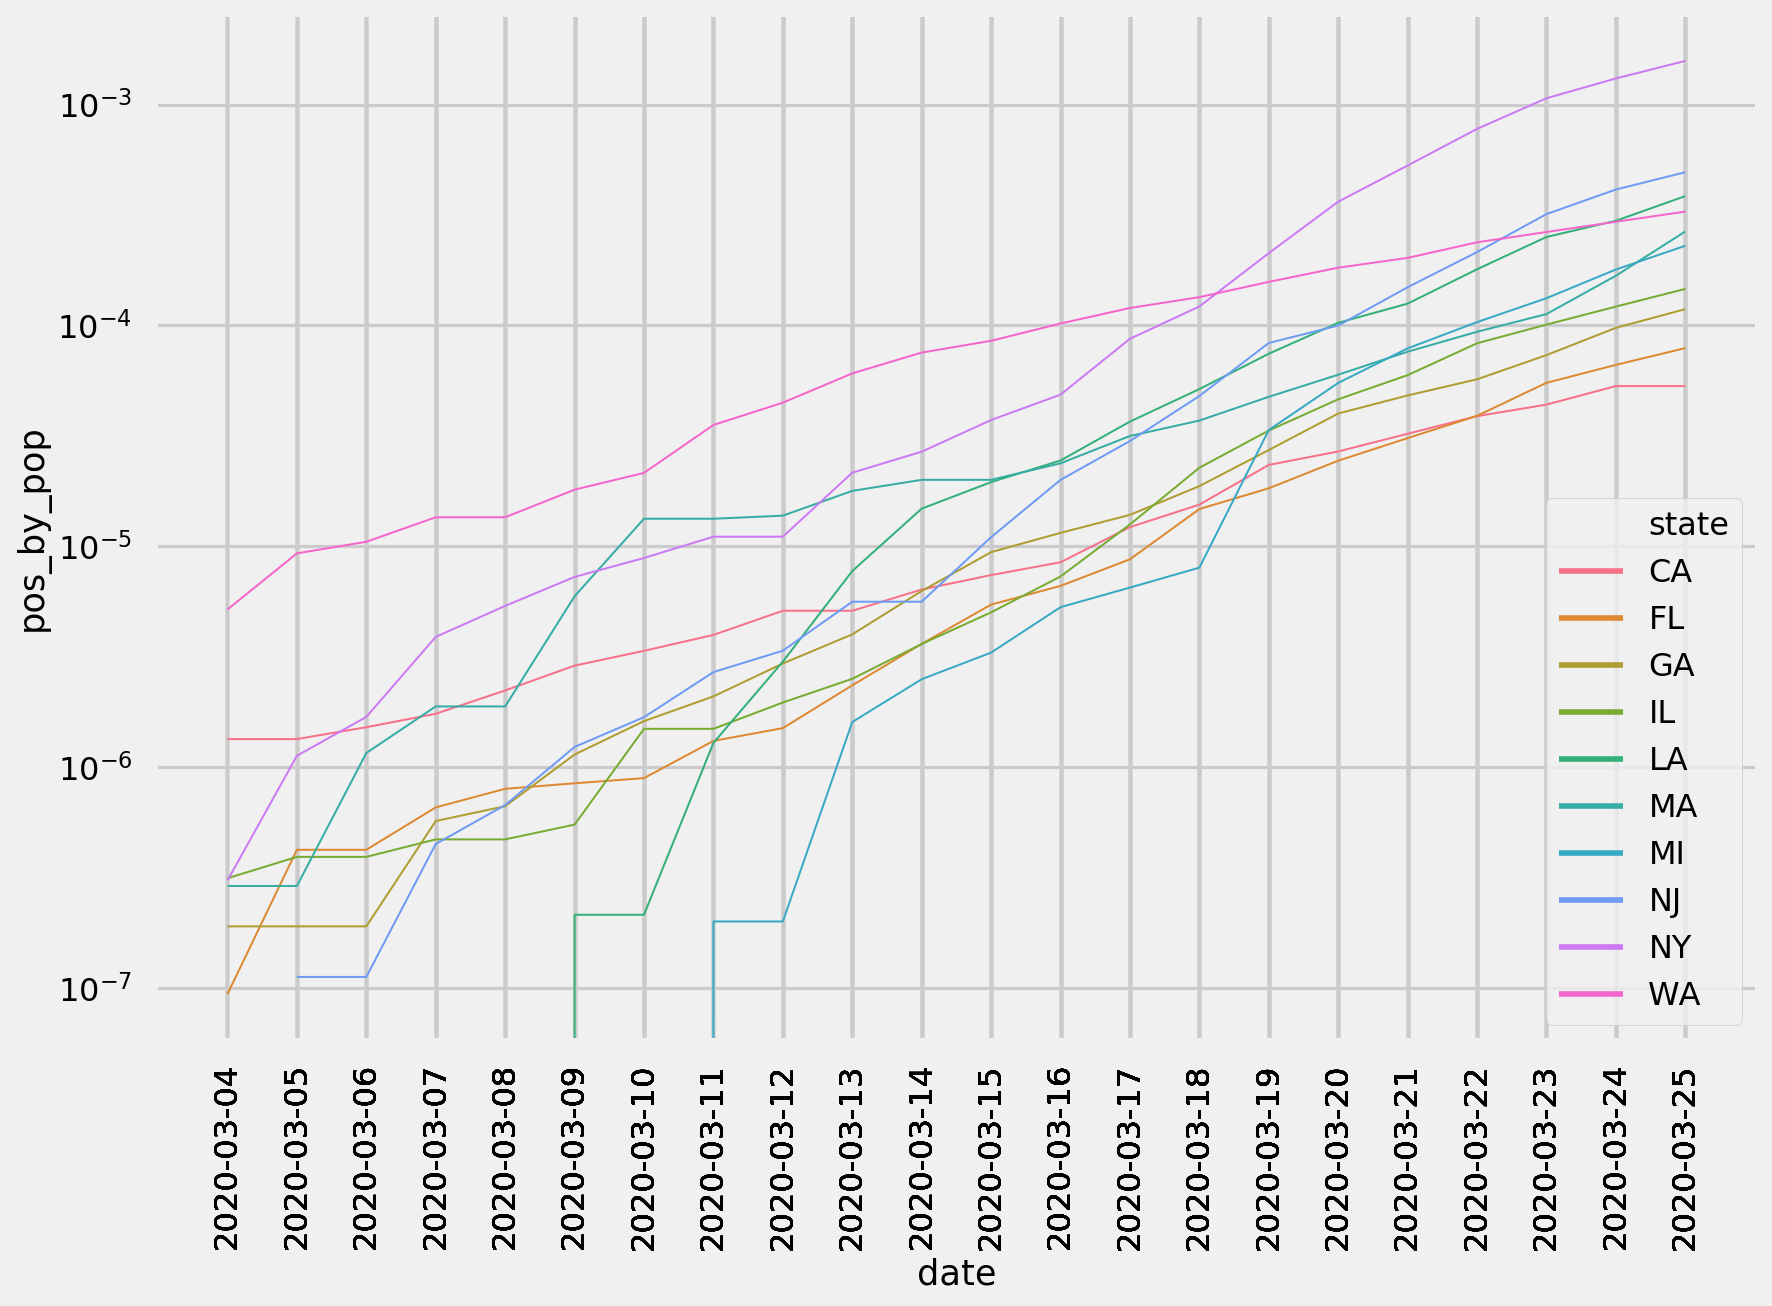

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

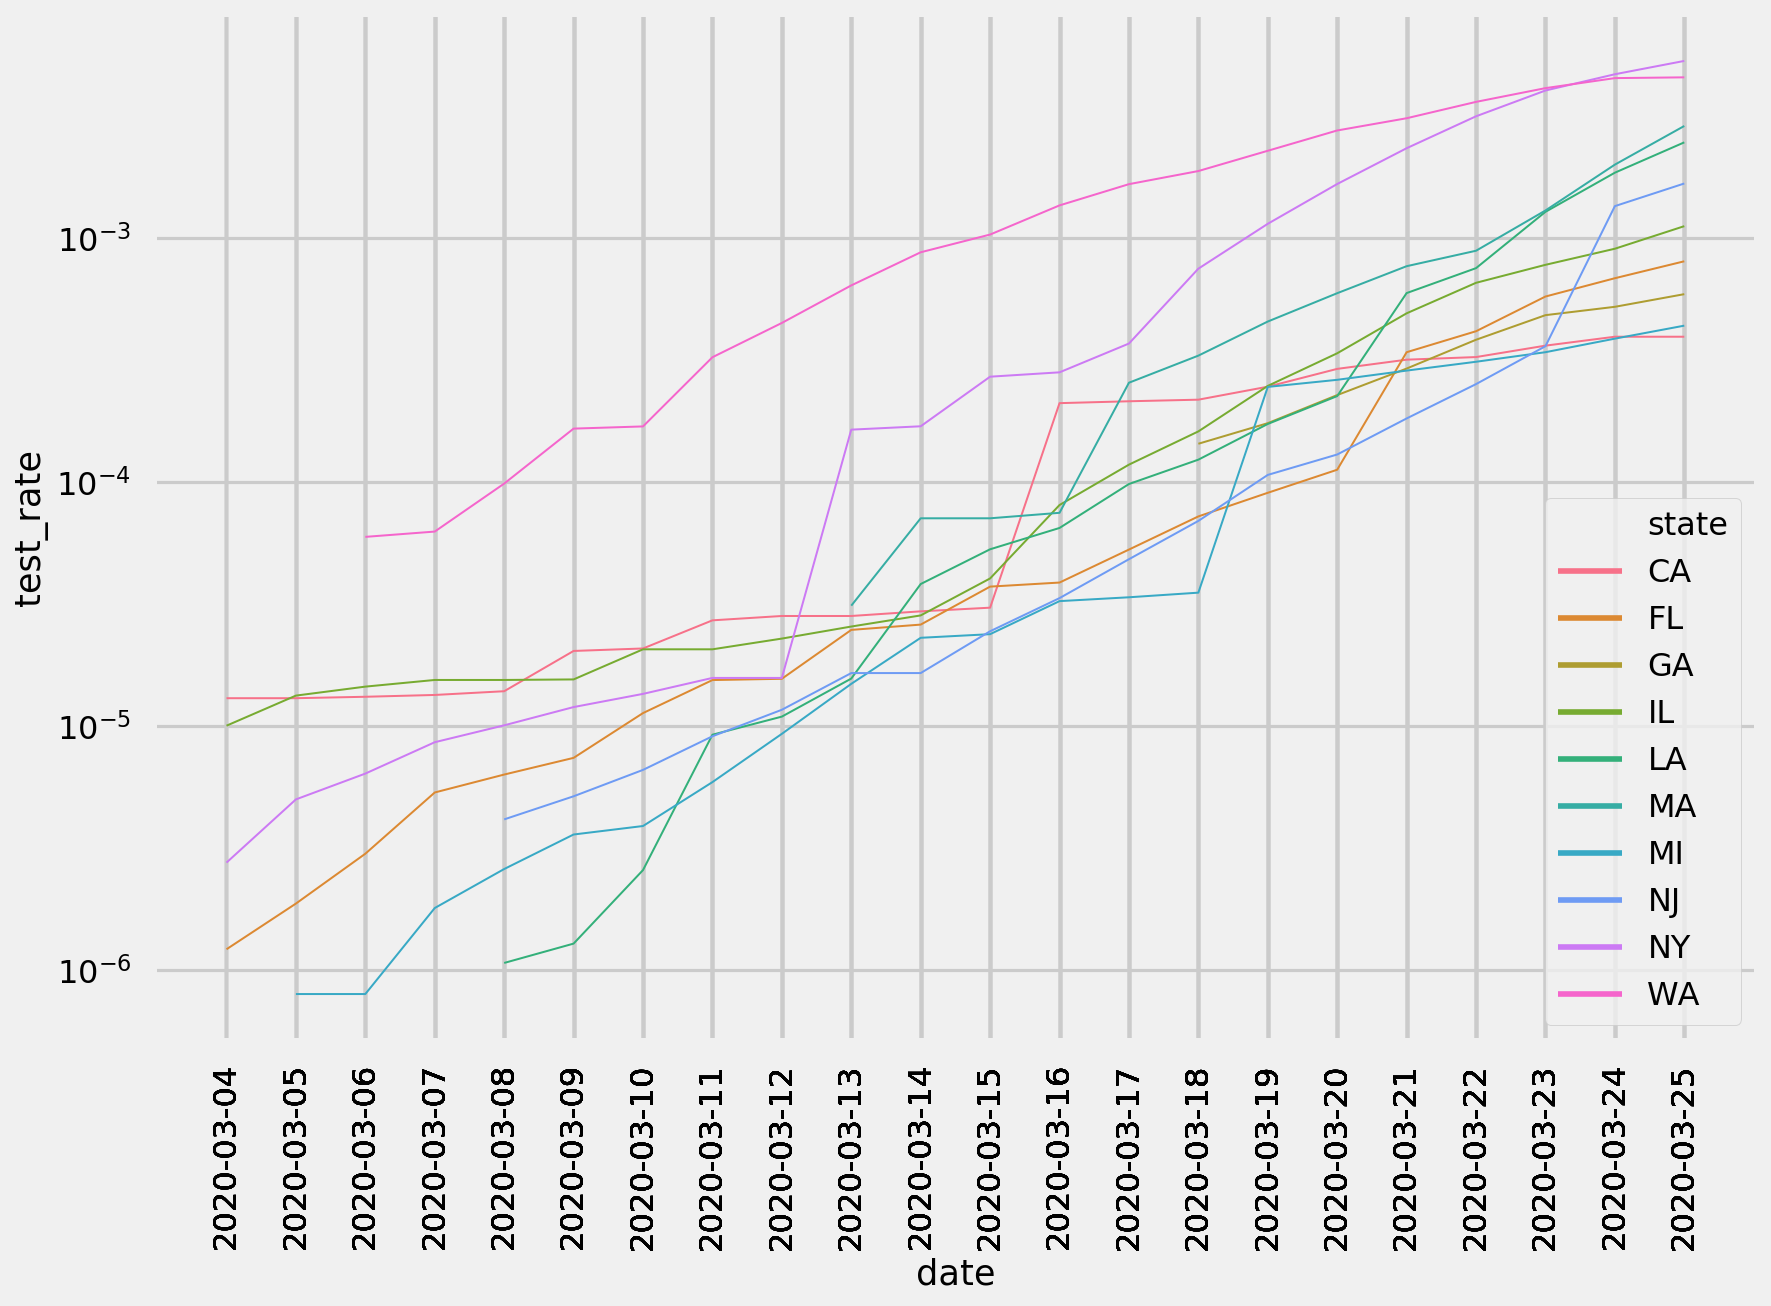

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()